### Prepare your environment

Imported libraries I will use throughout the project

In [ ]:
# Python 3 environment libraries

# ignore warnings
import warnings
warnings.filterwarnings("ignore")

# Wrangling
import pandas as pd
import numpy as np

# Exploring
import scipy.stats as stats

# Visualizing
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('classic')

# Modeling
import statsmodels.api as sm

from scipy.stats import pearsonr
from scipy.stats import iqr

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, median_absolute_error

### Data Acquisition

Acquire via a .csv file

In [ ]:
path = './'

In [ ]:
### Loading Dataset using 'properties_2016.csv'
dfproperties_2016 = pd.read_csv(path + 'properties_2016.csv')
dfproperties_2016.columns

In [ ]:
### Loading Dataset using 'train_2016.csv'
dftrain_2016 = pd.read_csv(path + 'train_2016.csv')

In [ ]:
### Creating data frame a
df_a = pd.DataFrame(dfproperties_2016, columns = [
      'bathroomcnt',
      'bedroomcnt',
      'calculatedfinishedsquarefeet',
      'fullbathcnt',
      'garagecarcnt',
      'regionidzip',
      'roomcnt',
      'yearbuilt',
      'taxvaluedollarcnt',
      'parcelid',
      'lotsizesquarefeet',
      'structuretaxvaluedollarcnt',
      'landtaxvaluedollarcnt',
      'taxamount'])

In [ ]:
### Creating data frame b
df_b = pd.DataFrame(dftrain_2016, columns = ['parcelid', 'logerror'])

In [ ]:
### Joining the both a and b along the 'parcelid' value
df_join = pd.merge(df_a, df_b, on='parcelid')

### Sumarize Data

In [ ]:
### Creating a summary with print statements
def summarize_df(df):
    print("\nRows & Columns:\n")
    print(df.shape)
    print("\nColumn Info:\n")
    print(df.info())
    print("\nFirst 5 rows:\n")
    print(df.head())
    print("\nLast 5 rows:\n")
    print(df.tail())
    print("\nMissing Values:\n")
    missing_vals = df.columns[df.isnull().any()]
    print(df.isnull().sum())
    print("\nSummary Stats:\n")
    print(df.describe())
    print("\nColumn IQR:\n")
    var_names = df.columns.values
    for var in var_names:
        print(var+":")
        print(iqr(df[var],axis=0))

In [ ]:
summarize_df(df_join)

### Data Preparation

Goal: leave this section with a dataset that is ready to be analyzed.

In [ ]:
### Create a variable, colnames, that is a list of the column names.
variables = pd.DataFrame(df_join.columns, columns=['colnames'])
variables

In [ ]:
### Replace Null Values
df_join = df_join.apply(lambda x: x.fillna(x.mean()),axis=0)

In [ ]:
### Remove Outliers Using Z-Score
df_remove_outliers = df_join[(np.abs(stats.zscore(df_join)) < 3).all(axis=1)]

In [ ]:
### Drop unnecessary columns
columns_to_remove = ['bathroomcnt',
                  'bedroomcnt',
                  'fullbathcnt',
                  'garagecarcnt',
                  'regionidzip',
                  'roomcnt',
                  'yearbuilt',
                  'parcelid']
df_fixed = df_remove_outliers.drop(columns_to_remove, axis=1)

### Create a list of the independent variable name
df_fixed.columns.values

In [ ]:
df_fixed.sort_values(['logerror'], ascending=True).sample(10)

In [ ]:
df_fixed.describe()

In [ ]:
### Create a list of the independent variable names (aka attributes) and assign it to x_vars
x_vars = df_fixed.columns.values

In [ ]:
### Clearly identify your dependent (target) variable
y = df_fixed.columns.values[6]

In [ ]:
summarize_df(df_fixed)

In [ ]:
### View the distribution of the numeric variables with histograms
plt.figure(figsize=(15,15))
plt.suptitle('Histogram to view distribution of the numeric variables')

for i, col in enumerate(['calculatedfinishedsquarefeet', 
                         'taxvaluedollarcnt',
                         'lotsizesquarefeet', 
                         'structuretaxvaluedollarcnt',
                         'landtaxvaluedollarcnt', 
                         'taxamount']):  
    plot_number = i + 1 # i starts at 0, but plot nos should start at 1
    series = df_fixed[col]  
    plt.subplot(4, 2, plot_number)
    plt.title(col)
    series.hist(bins=20, density=False, cumulative=False, log=False)

In [ ]:
### View the distribution of the numeric variables with boxplots
plt.figure(figsize=(15,15))
plt.suptitle('Histogram to view distribution of the numeric variables')

for i, col in enumerate(['calculatedfinishedsquarefeet', 
                         'taxvaluedollarcnt',
                         'lotsizesquarefeet', 
                         'structuretaxvaluedollarcnt',
                         'landtaxvaluedollarcnt', 
                         'taxamount']):  
    plot_number = i + 1 # i starts at 0, but plot nos should start at 1
    series = df_fixed[col]  
    plt.subplot(4, 2, plot_number)
    plt.title(col)
    series.plot.box()

### Data Exploration

Goal is to address each of the questions you posed in your planning & brainstorming through visual or statistical analysis.

In [534]:
### Split data into training and test datasets
X = df_fixed.drop(['logerror', 
                   'structuretaxvaluedollarcnt',
                   'landtaxvaluedollarcnt',
                   'lotsizesquarefeet'], axis=1)
y = df_fixed[['logerror']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0) 

train = pd.concat([X_train, y_train], axis=1)
test = pd.concat([X_test, y_test], axis=1)

In [535]:
print("Test columns:  %s" % list(test.columns))
print("Test dimensions (rows, columns):", test.shape)

Test columns:  ['calculatedfinishedsquarefeet', 'taxvaluedollarcnt', 'taxamount', 'logerror']
Test dimensions (rows, columns): (16683, 4)


ValueError: Could not interpret input 'lotsizesquarefeet'

<Figure size 800x640 with 0 Axes>

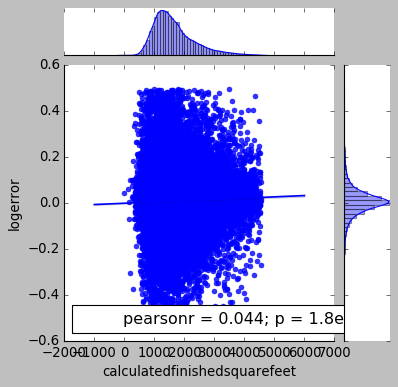

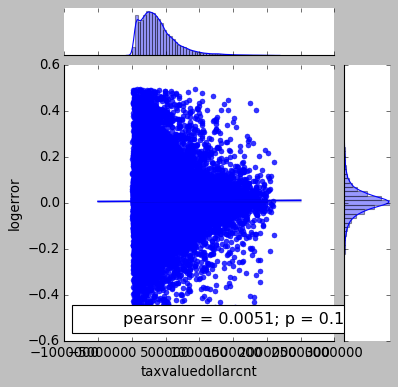

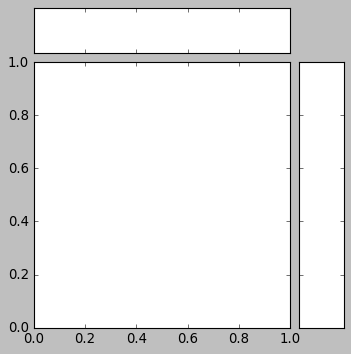

In [536]:
### Create a jointplot for each independent variable (normalized version) with the dependent variable.
plt.figure(figsize=(10, 8))

for i in range(0,3):
    j = sns.jointplot(x_vars[i], 'logerror', data=train, kind='reg', height=5);
    j.annotate(stats.pearsonr)

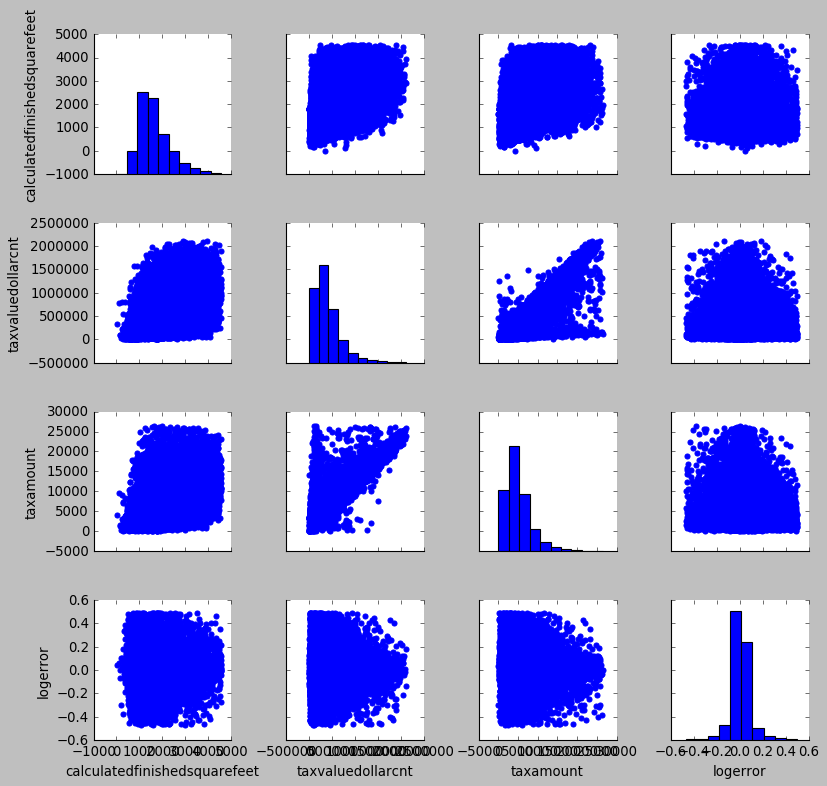

In [537]:
### Create a feature plot using seaborn's PairGrid() of the interaction between each variable (dependent + independent).
g = sns.PairGrid(train)
g.map_diag(plt.hist)
g.map_offdiag(plt.scatter);

(array([0.5, 1.5, 2.5, 3.5]), <a list of 4 Text xticklabel objects>)

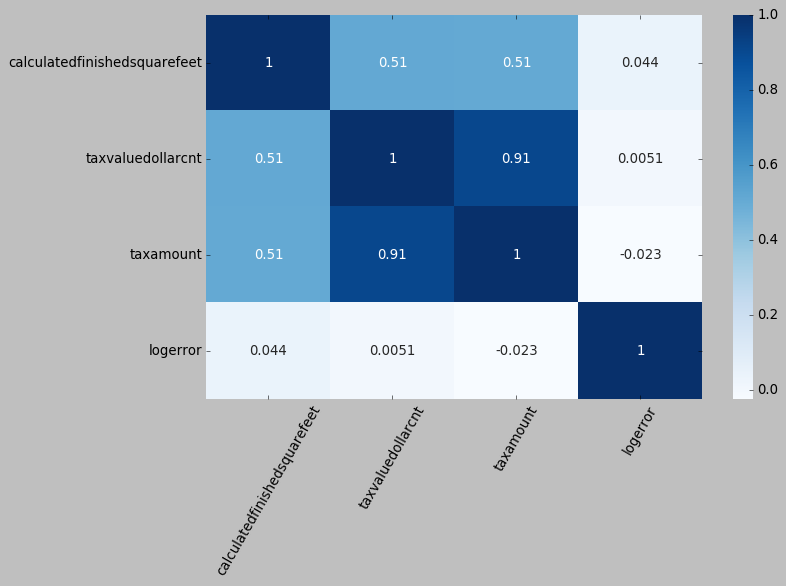

In [538]:
### Create a heatmap of the correlation between each variable pair.
plt.figure(figsize=(10,6))
sns.heatmap(train.corr(), cmap='Blues', annot=True)
plt.xticks(rotation=60)

In [539]:
### Is the logerror significantly different for homes with 3 bedrooms vs those with 5 or more bedrooms?
### three_br = train[train.bedroomcnt == 3]
### five_br = train[train.bedroomcnt >= 3]

### from scipy.stats import ttest_ind
### ttest_ind(three_br.logerror, five_br.logerror)

In [540]:
### Do the same for another 2 samples you are interested in comparing (e.g. those with 1 bath vs. x baths)
### one_ba = train[train.bathroomcnt <= 2]
### four_ba = train[train.bathroomcnt >= 3]

### from scipy.stats import ttest_ind
### ttest_ind(one_ba.logerror, four_ba.logerror)

### Data Modeling

In [541]:
X_train['price_per_sqf'] = (X_train.taxvaluedollarcnt / X_train.calculatedfinishedsquarefeet)
X_train.head()

,calculatedfinishedsquarefeet,taxvaluedollarcnt,taxamount,price_per_sqf
62784,2095.0,599000.0,7435.25,285.918854
74166,2198.0,373691.0,4860.98,170.014104
90068,2079.0,190314.0,2657.42,91.541126
36386,888.0,322207.0,3810.12,362.845721
68583,996.0,439303.0,5912.16,441.067269


In [542]:
### Create a dictionary that describe the r and p values
column_names = X_train.columns
r_and_p_values = [pearsonr(X_train[col], y_train.logerror) for col in column_names]

logerror_corr_dict = dict(zip(column_names, r_and_p_values))
logerror_corr_dict

{'calculatedfinishedsquarefeet': (0.043625382619129245, 1.756477432694317e-29),
 'taxvaluedollarcnt': (0.005143486936024097, 0.183967668663196),
 'taxamount': (-0.02288897447963253, 3.353418294255437e-09),
 'price_per_sqf': (-0.0034039493555651015, 0.3792461062614666)}

In [543]:
### Feature selection using statsmodels.OLS (Ordinary Least Squares)
ols_model = sm.OLS(y_train, X_train)
fit = ols_model.fit()
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               logerror   R-squared:                       0.016
Model:                            OLS   Adj. R-squared:                  0.016
Method:                 Least Squares   F-statistic:                     271.7
Date:                Fri, 22 Mar 2019   Prob (F-statistic):          4.17e-232
Time:                        16:51:01   Log-Likelihood:                 68723.
No. Observations:               66728   AIC:                        -1.374e+05
Df Residuals:                   66724   BIC:                        -1.374e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
calculatedfinishedsquarefeet  8.869e-06   3.88e-07     22.862      0.000    8.11e-06    9.63e-06
taxvaluedollarcnt             4.113e-08   2.89e-09     14.210      0.000    3.55e-08    4.68e-08
taxamount                    -4.462e-06   2.33e-07    -19.136      0.000   -4.92e-06   -4.01e-06
price_per_sqf                 3.456e-07   5.04e-07      0.685      0.493   -6.43e-07    1.33e-06
==============================================================================
Omnibus:                    11435.860   Durbin-Watson:                   1.992
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           124499.279
Skew:                           0.498   Prob(JB):                         0.00
Kurtosis:                       9.617   Cond. No.                         730.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""